<a href="https://colab.research.google.com/github/sanjanavb/sanjana-git/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB
None
   TransactionID TransactionDate   Amount  MerchantID TransactionType  \
0              1         15:35.5  4189.27         688          refund   
1              2         20:35.5  2659.71         109          refund   
2              3         08:35.5   784.00         394        purchase   
3              4         50:35.5  3514.40         944        purchase   
4              5         51:35.5   3

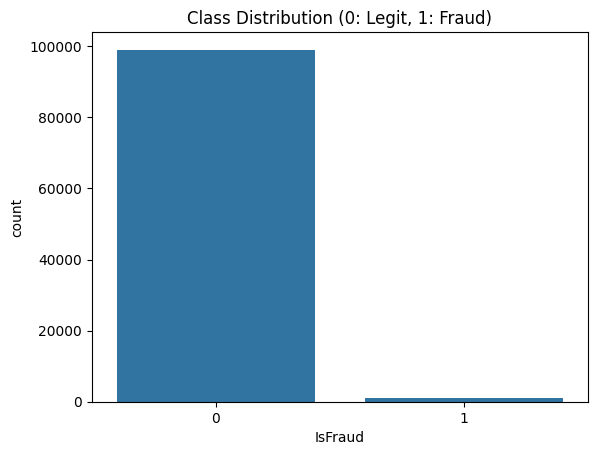

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE


df = pd.read_csv("credit_card_fraud_dataset.csv")

# Display dataset info
print(df.info())
print(df.head())

# Check class distribution
print(df["IsFraud"].value_counts())

# Visualizing class distribution
sns.countplot(x="IsFraud", data=df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.show()

In [6]:
scaler = StandardScaler()  # Initialize StandardScaler
df["Amount"] = scaler.fit_transform(df[["Amount"]])  # Normalize the 'Amount' column


In [9]:
X = df.drop(columns=["IsFraud"])
y = df["IsFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [11]:
df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')


In [14]:
df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')

# Handle missing values
df["Amount"].fillna(df["Amount"].median(), inplace=True)

# Standardize 'Amount'
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

print(df.head())  # Check the cleaned data


   TransactionID TransactionDate    Amount  MerchantID TransactionType  \
0              1         15:35.5  1.173161         688          refund   
1              2         20:35.5  0.112740         109          refund   
2              3         08:35.5 -1.187661         394        purchase   
3              4         50:35.5  0.705284         944        purchase   
4              5         51:35.5 -1.475326         475        purchase   

       Location  IsFraud  
0   San Antonio        0  
1        Dallas        0  
2      New York        0  
3  Philadelphia        0  
4       Phoenix        0  


<ipython-input-14-ca2521260b60>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(df["Amount"].median(), inplace=True)


In [17]:
X_train = X_train.drop(columns=["Location"], errors="ignore")
X_test = X_test.drop(columns=["Location"], errors="ignore")


In [18]:
X_train = X_train.drop(columns=["TransactionDate"], errors="ignore")
X_test = X_test.drop(columns=["TransactionDate"], errors="ignore")

In [21]:
X_train["TransactionType"] = pd.to_numeric(X_train["TransactionType"], errors="coerce")
X_test["TransactionType"] = pd.to_numeric(X_test["TransactionType"], errors="coerce")

In [22]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.002, random_state=42).fit(X_train)
y_pred_iso = [1 if p == -1 else 0 for p in iso_forest.predict(X_test)]

# Print F1 Score
print("Isolation Forest F1 Score:", f1_score(y_test, y_pred_iso))

Isolation Forest F1 Score: 0.008064516129032258


In [24]:
pip install xgboost

In [25]:
from xgboost import XGBClassifier


In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(X_train, y_train)

y_pred_rf, y_pred_xgb = rf.predict(X_test), xgb.predict(X_test)
print("Random Forest:", f1_score(y_test, y_pred_rf))
print("XGBoost:", f1_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest: 0.0
XGBoost: 0.0


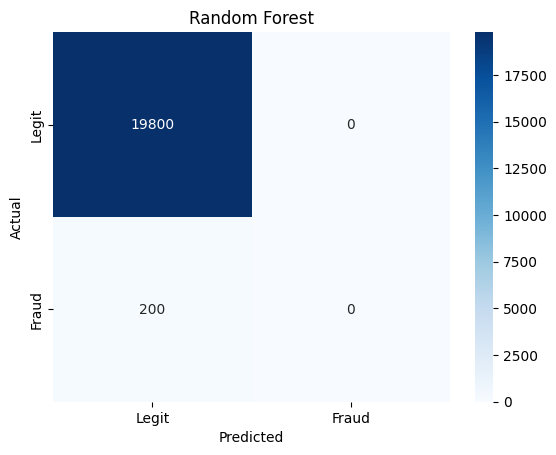

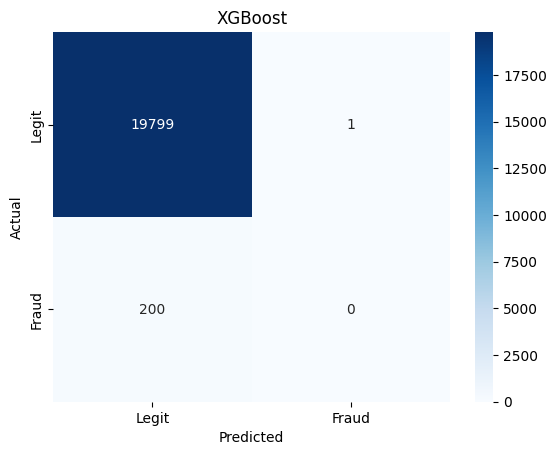

In [27]:
def plot_cm(y_true, y_pred, title):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
    plt.title(title), plt.xlabel("Predicted"), plt.ylabel("Actual"), plt.show()

plot_cm(y_test, y_pred_rf, "Random Forest")
plot_cm(y_test, y_pred_xgb, "XGBoost")
